## Import neurons from Matlab
<br>
Let's start importing some matfiles containing tuning curves from PN Matlab analysis results...

In [1]:
# import needed modules
import scipy.io
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from ipywidgets import widgets
from IPython.display import display

# import custom functions
from plotting_routines import plot_tc

%matplotlib inline 

In [2]:
# read tuning mat file
mat = scipy.io.loadmat('Tuning.mat')

In [3]:
# extract arrays from dictionary
DSI = mat['DSI'] 
OSI = mat['OSI'] 
Tc = mat['tuning_curve'] 
Tce = mat['tuning_curve_error'] 

In [4]:
# ask n value as input from user
# inputval=widgets.Text()
# display(inputval)
#if bool(inputval.value):
#    n_inp=int(inputval.value)
#    n=n_inp
#else:
#    n=1

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.


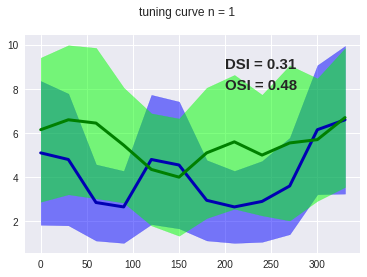

In [5]:
# select a given tuning curve
n=1
isf=0
itf=0
iid=0

col=[0,0,1] # choose errorbar color
coll=[0,0,0.7] # choose line color
tc=Tc[:,n,isf,itf,iid]
tce=Tce[:,n,isf,itf,iid]
dsi = DSI[n,isf,itf,iid]
osi = OSI[n,isf,itf,iid]

# plot with errorbar
fig_tc = plt.figure()
plot_tc(tc,tce,col,coll,dsi=dsi,osi=osi)
fig_tc.suptitle('tuning curve n = '+ "%.0f" % n)
fig_tc.hold(True)

# select a given tuning curve
isf=0
itf=0
iid=1

col=[0,1,0] # choose errorbar color
coll=[0,0.5,0] # choose line color
tc=Tc[:,n,isf,itf,iid]
tce=Tce[:,n,isf,itf,iid]
dsi = DSI[n,isf,itf,iid]
osi = OSI[n,isf,itf,iid]

# plot another with errorbar
plot_tc(tc,tce,col,coll)
fig_tc.suptitle('tuning curve n = '+ "%.0f" % n)

# save figure
plt.savefig('testfig.jpg')
plt.savefig('testfig.eps')

In [85]:
# read selected indeces mat file
selmat = scipy.io.loadmat('SI_distributionsV1f.mat')
# extract arrays from dictionary
selected = selmat['selectedsi'] 
selected=np.squeeze(selected)
selidx=np.zeros((len(selected),3))
for i in range(len(selected)):
    selidx[i,:]=np.squeeze(selected[i])

dsnidx=np.empty(shape=[0,3]) # modo di inizializzare empty array per accatastare orizzontalmente
for i in range(selidx.shape[0]):    
    tempindex=tuple((selidx[i,:].astype(int)-1))+(0,)
    if DSI[tempindex]>0.5:
        dsnidx=np.append(dsnidx,np.array([selidx[i,:]]),axis=0) # np.array([selid... -> expand dim
        # append(,axis=) , hstack e vstak hanno bisogno di partire da array con le dimensioni 
        # lungo cui NON accatasti uguali a quelle di ciò che accatasti (vedi vstack?)

array([], shape=(0, 3), dtype=float64)

/usr/local/Anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:89: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.


[]

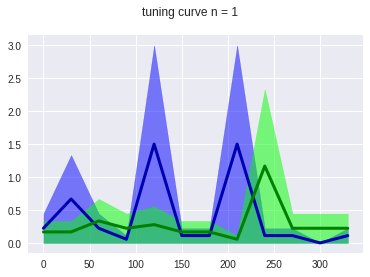

In [222]:
# create boolean array identifying pds pos and gds neurons 
boolgdsi=np.zeros((selidx.shape[0],1), dtype=bool)
for i in range(selidx.shape[0]):    
    tempindex=tuple((selidx[i,:].astype(int)-1))+(0,) # come sommare tuple per fare indexing composito
    boolgdsi[i,0]=DSI[tempindex]>0.5 

boolpdsi=np.zeros((selidx.shape[0],1), dtype=bool)
for i in range(selidx.shape[0]):    
    tempindex=tuple((selidx[i,:].astype(int)-1))+(1,)  
    boolpdsi[i,0]=DSI[tempindex]>0.5 
    
boolposi=np.zeros((selidx.shape[0],1), dtype=bool)
for i in range(selidx.shape[0]):    
    tempindex=tuple((selidx[i,:].astype(int)-1))+(1,)  
    boolposi[i,0]=OSI[tempindex]>0.5 

sboolpdsi=np.logical_and(boolgdsi,boolpdsi)
sboolposi=np.logical_and(boolgdsi,boolposi)
sboolposi_only=np.logical_and(np.logical_not(boolgdsi),boolposi)

# perform unclassified neurons classification
nlabel=np.zeros((selidx.shape[0],1), dtype=int)
prefdir=np.zeros((selidx.shape[0],2), dtype=int)
for i in range(selidx.shape[0]): 
    tempindexg=(slice(None),)+tuple((selidx[i,:].astype(int)-1))+(0,) 
    tempindexp=(slice(None),)+tuple((selidx[i,:].astype(int)-1))+(1,) 
    tcg =Tc[tempindexg]
    tcp =Tc[tempindexp]
    prefdir[i,0]=np.argmax(tcg)
    prefdir[i,1]=np.argmax(tcp)
    if prefdir[i,0]==prefdir[i,1] or prefdir[i,0]==prefdir[i,1]-6 or prefdir[i,0]==prefdir[i,1]+6:
        nlabel[i]=1 # nlabel=1 ---> pattern alligned
    elif prefdir[i,0]==(prefdir[i,1]+2) or prefdir[i,0]==(prefdir[i,1]-2) or prefdir[i,0]==(prefdir[i,1]+4) or prefdir[i,0]==(prefdir[i,1]-4):
        nlabel[i]=2 # nlabel=2 ---> component alligned

bool_pa_pd=np.logical_and(nlabel==1,sboolpdsi)
bool_pa_po=np.logical_and(nlabel==1,sboolposi_only)
bool_co_pd=np.logical_and(nlabel==2,sboolpdsi)
bool_co_po=np.logical_and(nlabel==2,sboolposi_only)
#print(bool_pa_pd.sum())
#print(bool_pa_po.sum())
#print(bool_co_pd.sum())
#print(bool_co_po.sum())

# get component alligned pds tuning curves
tcg_co_pd = np.zeros((bool_co_pd.sum(),12),dtype=float)
tcp_co_pd = np.zeros((bool_co_pd.sum(),12),dtype=float)
tcge_co_pd = np.zeros((bool_co_pd.sum(),12),dtype=float)
tcpe_co_pd = np.zeros((bool_co_pd.sum(),12),dtype=float)

count=0
for i in range(selidx.shape[0]): 
    if bool_co_pd[i]==1:
        tempindexg=(slice(None),)+tuple((selidx[i,:].astype(int)-1))+(0,) 
        tempindexp=(slice(None),)+tuple((selidx[i,:].astype(int)-1))+(1,) 
        tcg_co_pd[count,:] = np.expand_dims(Tc[tempindexg], axis=0)
        tcp_co_pd[count,:] = np.expand_dims(Tc[tempindexp], axis=0)
        tcge_co_pd[count,:] = np.expand_dims(Tce[tempindexg], axis=0)
        tcpe_co_pd[count,:] = np.expand_dims(Tce[tempindexp], axis=0)
        count+=1
        
# get component alligned pos tuning curves
tcg_co_po = np.zeros((bool_co_po.sum(),12),dtype=float)
tcp_co_po = np.zeros((bool_co_po.sum(),12),dtype=float)
tcge_co_po = np.zeros((bool_co_po.sum(),12),dtype=float)
tcpe_co_po = np.zeros((bool_co_po.sum(),12),dtype=float)

count=0
for i in range(selidx.shape[0]): 
    if bool_co_po[i]==1:
        tempindexg=(slice(None),)+tuple((selidx[i,:].astype(int)-1))+(0,) 
        tempindexp=(slice(None),)+tuple((selidx[i,:].astype(int)-1))+(1,) 
        tcg_co_po[count,:] = np.expand_dims(Tc[tempindexg], axis=0)
        tcp_co_po[count,:] = np.expand_dims(Tc[tempindexp], axis=0)
        tcge_co_po[count,:] = np.expand_dims(Tce[tempindexg], axis=0)
        tcpe_co_po[count,:] = np.expand_dims(Tce[tempindexp], axis=0)
        count+=1
   
ii=4
tcg=tcg_co_pd[ii,:]
tcp=tcp_co_pd[ii,:]
tcge=tcg_co_pd[ii,:]
tcpe=tcp_co_pd[ii,:]
figg = plt.figure()
col=[0,0,1] # choose errorbar color
coll=[0,0,0.7] # choose line color
plot_tc(tcg,tcge,col,coll)
figg.suptitle('tuning curve n = '+ "%.0f" % n)
figg.hold(True)   
col=[0,1,0] # choose errorbar color
coll=[0,0.5,0] # choose line color
plot_tc(tcp,tcpe,col,coll)   